# I. Assemble the data

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline
data_path = "C:/Users/SpiffyApple/Documents/USC/Courses/Fall2016/PPD599/project/DATA_Oct302016"

In [2]:
#Populate file lists and initiate containers
data_files = [str(x)+'.xlsx' for x in np.linspace(2006, 2010, 5).astype(int)]
data_files.extend([str(x)+'.csv' for x in np.linspace(2011, 2015, 5).astype(int)])
data_dict = {}

In [3]:
#Upload the data: load each file -> drop duplicated rows -> transpose -> clean markup -> convert to float
for data_file in data_files:
    #print(data_file)
    if "csv" not in data_file:
        data_dict[data_file.split(".")[0]] = pd.read_excel("/".join([data_path, data_file]), header=1, index_col=0).drop_duplicates().transpose().replace("%|\$|,", "", regex=True).astype(float)
        data_dict[data_file.split(".")[0]].columns = data_dict[data_file.split(".")[0]].columns.str.lower().str.replace(":","").str.replace("  ", " ")
    if "csv" in data_file:
        data_dict[data_file.split(".")[0]] = pd.read_csv("/".join([data_path, data_file]), header=1, index_col=0).drop_duplicates().transpose().replace("%|\$|,", "", regex=True).astype(float)
        data_dict[data_file.split(".")[0]].columns = data_dict[data_file.split(".")[0]].columns.str.lower().str.replace(":","").str.replace("  "," ")

In [4]:
#Check if all columbs in all files have been converted to numeric
for key in data_dict.keys():
    if all(data_dict['2006'].dtypes == np.float) != True:
        print(key)

In [5]:
#retrieve all columns as sets and initiate column set
col_sets = [set(data_dict[key]) for key in data_dict.keys()]
common_set = col_sets[0]

In [6]:
#some datasets had "total" instead of "total population"
for i in range(0,len(col_sets)):
    if "total population" not in col_sets[i]:
        print(i)

In [7]:
#intersect the set of all of the columns to obtain common columns across all datasets 
for i in range(1,len(col_sets)):
    common_set = common_set.intersection(col_sets[i])
print("Number of common columns: %d" %len(common_set)) 

Number of common columns: 40


In [8]:
#check if all data sets have the same size
for key in data_dict.keys():
    print(key,":" ,data_dict[key].loc[:,list(common_set)].shape)

2011 : (11, 40)
2014 : (11, 40)
2007 : (11, 40)
2013 : (11, 40)
2015 : (11, 40)
2008 : (11, 40)
2010 : (11, 40)
2012 : (11, 40)
2006 : (11, 40)
2009 : (11, 40)


In [20]:
#concatenate all of the datasets into a single multi-indexed frame
df = pd.concat([data_dict[key][list(common_set)] for key in data_dict.keys()], keys = data_dict.keys())
df.sort_index(inplace=True)

#rename the axis for easy interpretation; lower case titles
df.index.names = ['year', 'city']
df.columns = df.columns.str.lower()

In [21]:
df.reset_index(level=1, inplace=True)
df['city'] = df.city.str.extract("(\w+) city", expand=False)

In [22]:
df['poverty_rate'] = df['living in poverty']/df['population age 18 to 64 for whom poverty status is determined']
#df['foregin_rate'] = df['foreign born'].div(df['total population'])
df['rent_rate'] = df['renter occupied'].div(df['housing units'])
df['renter_rate'] = df['renter occupied'].div(df['housing units'])
df['unemployment_rate'] = df['unemployed'].div(df['civilian population in labor force 16 years and over'])
df['prop_black'] = df['black or african american alone'].div(df['total population'])
df['prop_married'] = df['now married (not including separated)'].div(df['population 15 years and over'])
df['prop_highschoool'] = df['high school graduate (includes equivalency)'].div(df['population 25 years and over'])
df['prop_college'] = df["bachelor's degree"].div( df['population 25 years and over'])

In [23]:
quint_cols = df.columns[df.columns.str.contains('quintile')]
df.ix[[str(x) for x in range(2011, 2016)],quint_cols] = df.ix[[str(x) for x in range(2011, 2016)]].loc[:,quint_cols]/100

In [24]:
#dump whole data to csv for later use
df.to_csv("/".join([data_path,"prelim_2006_2015.csv"]))

### II. Assess trends

In [15]:
#looking at the proportion of people at 60th percentile income (our outcome variable)
quintiles = df['third quintile'].unstack().sort_index()
quintiles
#clearly there's an issue with the consistency in numbers. hm. 

city,"Atlanta city, Georgia","Charlotte city, North Carolina","Dallas city, Texas","Detroit city, Michigan","Houston city, Texas","Oakland city, California","Phoenix city, Arizona","Portland city, Oregon","Raleigh city, North Carolina","Seattle city, Washington","Washington city, District of Columbia"
year,,,,,,,,,,,
2006,0.113,0.136,0.122,0.153,0.131,0.138,0.146,0.145,0.149,0.144,0.128
2007,0.114,0.140,0.122,0.144,0.123,0.132,0.147,0.148,0.142,0.141,0.125
2008,0.118,0.137,0.121,0.148,0.128,0.135,0.147,0.146,0.143,0.139,0.126
2009,0.113,0.134,0.122,0.144,0.129,0.141,0.150,0.151,0.146,0.144,0.130
2010,0.118,0.137,0.128,0.142,0.131,0.136,0.140,0.142,0.145,0.142,0.131
2011,0.117,0.131,0.123,0.141,0.126,0.132,0.146,0.140,0.147,0.143,0.131
2012,0.112,0.133,0.125,0.135,0.125,0.128,0.145,0.146,0.146,0.143,0.131
2013,0.112,0.130,0.117,0.136,0.125,0.135,0.143,0.145,0.145,0.144,0.133
2014,0.113,0.135,0.119,0.141,0.123,0.132,0.143,0.141,0.136,0.147,0.139


In [ ]:
#fix the inconsistency of the entries
quint_cols = df.columns[df.columns.str.contains("quintile")]
#quintiles.loc[[str(x) for x in range(2011, 2016)]] = quintiles.loc[[str(x) for x in range(2011, 2016)]]/100

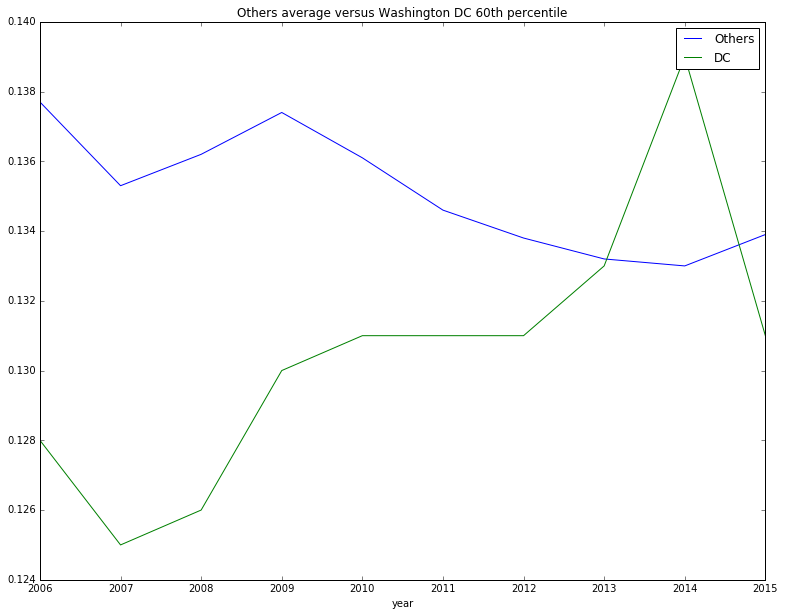

In [36]:
#quintiles.plot(figsize = (15,10))
plt.figure(figsize=(13,10))
quintiles.iloc[:,:-1].mean(axis=1).plot(label='Others')
quintiles.iloc[:,-1].plot(label='DC')
plt.legend()
plt.title("Others average versus Washington DC 60th percentile")
plt.savefig("/".join([data_path, "dc_others.png"]))

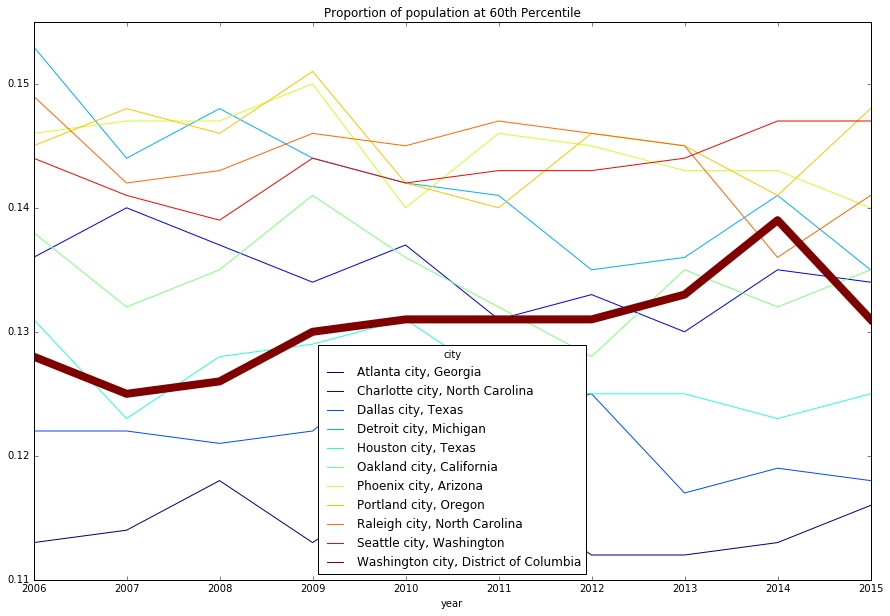

In [18]:
ax = quintiles.plot(figsize = (15,10), colormap='jet')
ax.lines[-1].set_linewidth(8)
plt.title("Proportion of population at 60th Percentile")
plt.savefig("/".join([data_path,"60th_percentile.png"]))